In [3]:
import numpy as np
import pandas as pf
import matplotlib.pyplot as plt

In [4]:
word_embedding = {
    "cat":    [1.0, 2.0],
    "kitten": [1.1, 2.1],

    "dog":    [2.0, 2.0],
    "puppy":  [2.1, 2.1],

    "car":    [5.0, 1.0],
    "truck":  [5.2, 1.2]
}

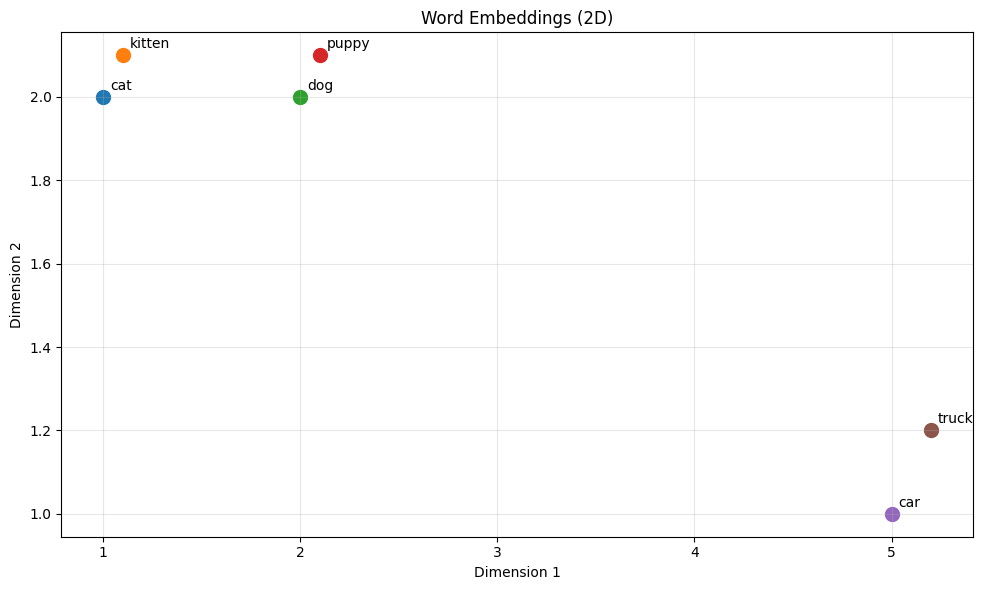

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

for word, coords in word_embedding.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(
        word,
        (coords[0], coords[1]),
        xytext=(5, 5),
        textcoords='offset points'
    )

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("Word Embeddings (2D)")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [23]:
## Cosine Similarity
def cosine_similarity(vec1, vec2):
    vec1 = vec1.flatten()
    vec2 = vec2.flatten()
    dot_product=np.dot(vec1, vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)

In [24]:
word_embedding

{'cat': [1.0, 2.0],
 'kitten': [1.1, 2.1],
 'dog': [2.0, 2.0],
 'puppy': [2.1, 2.1],
 'car': [5.0, 1.0],
 'truck': [5.2, 1.2]}

In [28]:
# Convert to numpy arrays
cat = np.array(word_embedding["cat"]).reshape(1, -1)
kitten = np.array(word_embedding["kitten"]).reshape(1, -1)
dog = np.array(word_embedding["dog"]).reshape(1, -1)
puppy = np.array(word_embedding["puppy"]).reshape(1, -1)
car = np.array(word_embedding["car"]).reshape(1, -1)
truck = np.array(word_embedding["truck"]).reshape(1, -1)


In [29]:
cat_kitten_similarity = cosine_similarity(cat, kitten)
print(cat_kitten_similarity)

0.9998220482235222


## Create Embedding

In [34]:
## Hugging Face

from langchain_huggingface import HuggingFaceEmbeddings

## initialize a embedding model (no api required)
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [40]:
text = "Hello, I am Learning about embedding"
embedding = embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length: {len(embedding)}")
print(embedding)


Text: Hello, I am Learning about embedding
Embedding length: 384
[-0.012541016563773155, -0.0842897891998291, -0.0037359814159572124, -0.003694455372169614, 0.02905438467860222, 0.06126972287893295, 0.012031041085720062, 0.017726920545101166, 0.04343545809388161, -0.02813180908560753, 0.020118646323680878, 0.07650147378444672, 0.04530565068125725, 0.002256053499877453, -0.05790167674422264, 0.014729858376085758, 0.05218644067645073, 0.056562963873147964, -0.09237097203731537, -0.02778215892612934, -0.028742684051394463, -0.054919082671403885, 0.01118689589202404, -0.1067948266863823, 0.013341418467462063, -0.018864065408706665, -0.005179101601243019, 0.07339484989643097, 0.10817255079746246, -0.07271407544612885, 0.05805008113384247, -0.03648955002427101, -0.0010906889801844954, 0.0577571727335453, -0.0755336582660675, 0.11141463369131088, 0.025488978251814842, -0.013313296250998974, -0.07460536807775497, -0.010939519852399826, 0.019129646942019463, 0.014313778840005398, -0.02357240207

In [43]:
sentences = [
    "Hello, I am Learning about embedding",
    "Machine learning is fascinating",
    "Python is great for data science",
    "Embeddings convert text to vectors"
]

embedding = embeddings.embed_documents(sentences)
print(f"Text: {sentences}")
print(f"Embedding length: {len(embedding)}")
for i in range(len(embedding)):
    print(embedding[i])


Text: ['Hello, I am Learning about embedding', 'Machine learning is fascinating', 'Python is great for data science', 'Embeddings convert text to vectors']
Embedding length: 4
[-0.012541079893708229, -0.08428976684808731, -0.0037359707057476044, -0.003694445826113224, 0.029054459184408188, 0.06126970425248146, 0.01203097403049469, 0.017726950347423553, 0.04343542829155922, -0.02813177928328514, 0.020118655636906624, 0.07650157064199448, 0.045305658131837845, 0.0022559973876923323, -0.05790167674422264, 0.014729895628988743, 0.052186448127031326, 0.05656292289495468, -0.09237097948789597, -0.02778215892612934, -0.028742684051394463, -0.05491911247372627, 0.011186935938894749, -0.10679476708173752, 0.013341369107365608, -0.018864035606384277, -0.005179105792194605, 0.07339489459991455, 0.10817254334688187, -0.07271409779787064, 0.05805009976029396, -0.03648947551846504, -0.0010906389215961099, 0.0577571764588356, -0.07553368806838989, 0.11141463369131088, 0.025488968938589096, -0.0133133